# [*] Multilayer Perceptron - Implémentation from Scratch

**Projet de Machine Learning - Classification Binaire du Cancer du Sein**

---

Ce notebook présente une implémentation complète d'un **perceptron multicouche (MLP)** depuis zéro, sans utiliser de bibliothèques de deep learning comme TensorFlow ou PyTorch. 

## [*] API Keras-like avec Classes Custom

Ce projet implémente une **API similaire à Keras** avec des classes personnalisées :

- **`CustomSequential`** : Modèle séquentiel inspiré de `keras.Sequential`
- **`DenseLayer`** : Couches denses avec activations (ReLU, Sigmoid, Softmax)
- **Optimiseurs** : `SGD` et `Adam` personnalisés
- **Fonctions de perte** : `BinaryCrossEntropy`, `CategoricalCrossEntropy`, `MeanSquaredError`
- **Métriques** : `Accuracy`, `Precision`, `Recall`, `F1Score`
- **Callbacks** : `History` et `EarlyStopping`

**Interface familière** : `compile()`, `fit()`, `predict()`, `evaluate()` - comme dans Keras !

## [=] Table des matières

1. [Installation et Configuration](#1-installation-et-configuration)
2. [Introduction](#2-introduction)
3. [Architecture du Projet](#3-architecture-du-projet)
4. [Composants Principaux](#4-composants-principaux)
5. [Exemple d'Utilisation](#5-exemple-dutilisation)
   - [Démos de Training](#57-démos-de-training---comparaison-de-différentes-configurations)
   - [Comparaison Visuelle](#58-comparaison-visuelle-des-différents-modèles)
   - [Démo de Prédiction](#59-démo-de-prédiction)
6. [Résultats et Performance](#6-résultats-et-performance)
7. [Détails Techniques](#7-détails-techniques)
8. [Conclusion](#8-conclusion)

> **Note** : Dans Jupyter/Colab, les liens peuvent ne pas fonctionner parfaitement avec les accents. Utilisez `Ctrl+F` (ou `Cmd+F` sur Mac) pour rechercher une section par son titre, ou le menu de navigation à gauche dans Colab.

## 1. Installation et Configuration

### 1.1 Clonage du Repository

Pour utiliser ce projet, nous devons d'abord cloner le repository GitHub contenant tous les fichiers source (classes Custom, modules, etc.).

## 2. Introduction

### 2.1 Contexte

Ce projet implémente un réseau de neurones artificiels complet pour la classification binaire, en suivant l'architecture et l'API de **Keras/TensorFlow**. L'objectif pédagogique est de comprendre chaque ligne de code derrière un réseau de neurones.

### 2.2 API Keras-like avec Classes Custom

L'implémentation suit une **API similaire à Keras** avec des classes personnalisées :

```python
# Construction du modèle (comme keras.Sequential)
model = CustomSequential([
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=1, activation="sigmoid")
])

# Compilation (comme model.compile())
model.ft_compile(
    optimizer="Adam",
    loss="bce",
    metrics=["Accuracy"],
    learning_rate=0.0314
)

# Entraînement (comme model.fit())
history = model.ft_fit(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    epochs=70,
    batch_size=8
)

# Prédiction (comme model.predict())
y_pred = model.ft_predict(X_test)

# Évaluation (comme model.evaluate())
loss, metrics = model.ft_evaluate(X_valid, y_valid)
```

### 2.3 Dataset

- **Wisconsin Breast Cancer Dataset** (UCI Machine Learning Repository)
- **569 échantillons** avec **30 caractéristiques**
- **Classification binaire** : Malignant (M) vs Benign (B)
- **Aucune valeur manquante**

### 2.4 Objectifs

[+] Implémentation complète d'un MLP depuis zéro  
[+] API Keras-like avec classes Custom  
[+] Au moins 2 couches cachées  
[+] Algorithme de rétropropagation (backpropagation)  
[+] Descente de gradient avec optimiseurs avancés  
[+] Préprocessing et normalisation des données  
[+] Visualisation des courbes d'apprentissage

In [37]:
# Clonage du repository GitHub
REPO_URL = "https://github.com/ai-dg/multilayer-perceptron.git"

import os
if not os.path.exists("multilayer-perceptron"):
    print("[>] Clonage du repository...")
    !git clone {REPO_URL}
    print("[+] Repository cloné avec succès")
else:
    !rm -rf ./multilayer-perceptron
    !git clone {REPO_URL}
    print("[+] Repository déjà présent")

# Changement de répertoire
%cd multilayer-perceptron

# Installation des dépendances
print("\\n[*] Installation des dépendances...")
!pip install numpy pandas matplotlib tabulate -q

# Importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("[+] Dépendances installées et importées avec succès")
print(f"[*] Répertoire de travail: {os.getcwd()}")

[>] Clonage du repository...
Cloning into 'multilayer-perceptron'...
remote: Enumerating objects: 1138, done.
remote: Counting objects: 100% (1138/1138), done.
remote: Compressing objects: 100% (937/937), done.
remote: Total 1138 (delta 242), reused 1070 (delta 187), pack-reused 0 (from 0)
Receiving objects: 100% (1138/1138), 36.70 MiB | 9.75 MiB/s, done.
Resolving deltas: 100% (242/242), done.
[+] Repository cloné avec succès
/home/dagudelo/Projects/multilayer-perceptron/multilayer-perceptron/multilayer-perceptron/multilayer-perceptron
\n[*] Installation des dépendances...
[+] Dépendances installées et importées avec succès
[*] Répertoire de travail: /home/dagudelo/Projects/multilayer-perceptron/multilayer-perceptron/multilayer-perceptron/multilayer-perceptron


## 3. Architecture du Projet

Le projet est organisé en modules modulaires et extensibles avec des **classes Custom** inspirées de Keras :

```
multilayer-perceptron/
├── mlp.py              # Point d'entrée principal (CLI)
├── custom_model.py      # CustomSequential (comme keras.Sequential)
├── custom_layer.py      # DenseLayer (comme keras.layers.Dense)
├── optimizers.py        # SGD, Adam (comme keras.optimizers)
├── losses.py            # BinaryCrossEntropy, etc. (comme keras.losses)
├── metrics.py           # Accuracy, Precision, etc. (comme keras.metrics)
├── callbacks.py         # History, EarlyStopping (comme keras.callbacks)
├── data_processor.py    # Traitement des données
└── plotting.py          # Visualisations
```

### Classes Custom Principales

| Classe Custom | Équivalent Keras | Description |
|---------------|------------------|-------------|
| `CustomSequential` | `keras.Sequential` | Modèle séquentiel empilant les couches |
| `DenseLayer` | `keras.layers.Dense` | Couche dense avec activation |
| `SGD`, `Adam` | `keras.optimizers.SGD/Adam` | Optimiseurs pour la descente de gradient |
| `BinaryCrossEntropy` | `keras.losses.BinaryCrossentropy` | Fonction de perte pour classification binaire |
| `Accuracy`, `Precision`, etc. | `keras.metrics.*` | Métriques d'évaluation |
| `History`, `EarlyStopping` | `keras.callbacks.*` | Callbacks pour le suivi de l'entraînement |

### Architecture du Réseau

```
Input Layer (30 features)
    ↓
Hidden Layer 1 (24 neurons, ReLU)
    ↓
Hidden Layer 2 (24 neurons, ReLU)
    ↓
Output Layer (1 neuron, Sigmoid) → Binary Classification
```

## 4. Composants Principaux

### 4.1 Couche Dense (DenseLayer)

Chaque couche effectue une transformation linéaire suivie d'une fonction d'activation :

**Transformation Linéaire:**
$$
Z = XW + b
$$

Où :
- $X \in \mathbb{R}^{(m, d)}$ : batch d'entrée (m échantillons, d features)
- $W \in \mathbb{R}^{(d, u)}$ : poids (d entrées, u neurones)
- $b \in \mathbb{R}^{(u)}$ : biais
- $Z \in \mathbb{R}^{(m, u)}$ : pré-activation

**Activation:**
$$
A = f(Z)
$$

**Backward Pass (Backpropagation):**
$$
dZ = dA \cdot f'(Z) \\
dW = X^T dZ \\
db = \sum dZ \\
dX = dZ W^T
$$

In [38]:
# Affichage du code de la couche dense (extrait)
print("""
class DenseLayer:
    def ft_forward(self, X):
        Z = X @ W + b  # Transformation linéaire
        A = self.ft_activation_forward(Z)  # Activation
        return A
    
    def ft_backward(self, dA):
        dZ = dA * self.ft_activation_backward(A)
        dW = X.T @ dZ
        db = np.sum(dZ, axis=0)
        dX = dZ @ W.T
        return dX
""")


class DenseLayer:
    def ft_forward(self, X):
        Z = X @ W + b  # Transformation linéaire
        A = self.ft_activation_forward(Z)  # Activation
        return A

    def ft_backward(self, dA):
        dZ = dA * self.ft_activation_backward(A)
        dW = X.T @ dZ
        db = np.sum(dZ, axis=0)
        dX = dZ @ W.T
        return dX



### 4.2 Fonctions d'Activation

**ReLU** (couches cachées) :
$$
\text{ReLU}(z) = \max(0, z)
$$

Dérivée :
$$
\text{ReLU}'(z) = \begin{cases} 1 & z > 0 \\ 0 & z \le 0 \end{cases}
$$

**Sigmoid** (sortie binaire) :
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Dérivée :
$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$

**Softmax** (sortie multi-classe) :
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

> **Note** : Pour la stabilité numérique, on soustrait le maximum avant l'exponentiation : $z_i - \max(z)$

### 4.3 Fonction de Perte - Binary Cross-Entropy

$$
L = -\frac{1}{N}\sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]
$$

**Gradient simplifié** (avec sigmoid) :
$$
\frac{\partial L}{\partial Z} = \hat{y} - y
$$

**Stabilité numérique** : Les prédictions sont clipées à $[\epsilon, 1-\epsilon]$ où $\epsilon = 10^{-12}$ pour éviter $\log(0)$.

### 4.5 Cycle d'Entraînement

Chaque époque suit cette séquence :

```
EPOCH N
  → Forward pass    : Calcul des prédictions
  → Loss computation : Calcul de la perte
  → Backward pass    : Calcul des gradients (backpropagation)
  → Weight update    : Mise à jour des poids avec l'optimiseur
```

**Forward Pass** : Les données traversent le réseau de l'entrée vers la sortie
$$
X \rightarrow \text{Dense}_1 \rightarrow \text{Dense}_2 \rightarrow \cdots \rightarrow \text{Dense}_L \rightarrow \hat{y}
$$

**Backward Pass** : Les gradients remontent de la sortie vers l'entrée
$$
\text{Loss} \rightarrow \frac{\partial L}{\partial \hat{y}} \rightarrow \text{Dense}_L \rightarrow \cdots \rightarrow \text{Dense}_1 \rightarrow \text{gradients}
$$

### 4.6 Métriques d'Évaluation

Les métriques sont calculées à partir de la matrice de confusion :

**Éléments de la matrice de confusion** :
- **TP** (True Positives) : $\sum [\hat{y}=1 \land y=1]$ - Vrais positifs
- **FP** (False Positives) : $\sum [\hat{y}=1 \land y=0]$ - Faux positifs
- **TN** (True Negatives) : $\sum [\hat{y}=0 \land y=0]$ - Vrais négatifs
- **FN** (False Negatives) : $\sum [\hat{y}=0 \land y=1]$ - Faux négatifs

**Accuracy** :
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Precision** (fiabilité des prédictions positives) :
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Recall** (capacité à détecter les positifs) :
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**F1-Score** (moyenne harmonique de Precision et Recall) :
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### 4.7 Callbacks

**History** : Stocke les métriques à chaque époque pour visualisation et analyse.

**Early Stopping** : Arrête l'entraînement si la validation loss ne s'améliore plus.

**Condition d'arrêt** :
$$
\text{val\_loss}_{\text{epoch}} > \text{best\_val\_loss} - \text{min\_delta}
$$

pendant `patience` époques consécutives. Cela évite le surapprentissage et économise du temps de calcul.
$$
\text{val\_loss}_{\text{epoch}} > \text{best\_val\_loss} - \text{min\_delta}
$$

pendant `patience` époques consécutives. Cela évite le surapprentissage et économise du temps de calcul.

### 4.4 Optimiseurs

**SGD (Stochastic Gradient Descent)** :
$$
W := W - \alpha \cdot dW
$$

Où $\alpha$ est le taux d'apprentissage (learning rate).

**Adam (Adaptive Moment Estimation)** :

Adam combine momentum et taux d'apprentissage adaptatif :

**Premier moment (momentum)** :
$$
m_t = \beta_1 m_{t-1} + (1-\beta_1) dW
$$

**Deuxième moment (adaptatif)** :
$$
v_t = \beta_2 v_{t-1} + (1-\beta_2) dW^2
$$

**Correction de biais** :
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

**Mise à jour des poids** :
$$
W := W - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

Paramètres par défaut : $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-8}$

## 5. Exemple d'Utilisation

### 5.1 Importation des Classes Custom

Maintenant que le repository est cloné, nous pouvons importer toutes les classes Custom qui implémentent l'API Keras-like.

In [39]:
# Création des dossiers nécessaires
os.makedirs("datasets", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("plots", exist_ok=True)

# Importation des classes Custom (API Keras-like)
print("[*] Importation des classes Custom...")
try:
    from custom_model import CustomSequential      # Équivalent à keras.Sequential
    from custom_layer import DenseLayer            # Équivalent à keras.layers.Dense
    from data_processor import DataProcessor
    from callbacks import History, EarlyStopping    # Équivalents à keras.callbacks
    from plotting import ft_plot_learning_curves
    
    print("[+] Classes Custom importées avec succès:")
    print("   - CustomSequential (comme keras.Sequential)")
    print("   - DenseLayer (comme keras.layers.Dense)")
    print("   - History, EarlyStopping (comme keras.callbacks)")
    print("   - DataProcessor, plotting utilities")
except ImportError as e:
    print(f"[-] Erreur d'importation : {e}")
    print("Veuillez vérifier que le repository a été cloné correctement.")

[*] Importation des classes Custom...
[+] Classes Custom importées avec succès:
   - CustomSequential (comme keras.Sequential)
   - DenseLayer (comme keras.layers.Dense)
   - History, EarlyStopping (comme keras.callbacks)
   - DataProcessor, plotting utilities


### 5.2 Téléchargement du Dataset (si nécessaire)

Si vous n'avez pas le dataset, vous pouvez le télécharger depuis l'UCI Repository.

In [40]:
# Téléchargement du dataset depuis UCI (optionnel)
# Décommentez si vous n'avez pas le fichier data.csv

# import urllib.request
# import os
# 
# os.makedirs("datasets", exist_ok=True)
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# urllib.request.urlretrieve(url, "datasets/data.csv")
# print("[+] Dataset téléchargé depuis UCI Repository")

# Vérification de l'existence du dataset
if os.path.exists("./datasets/data.csv"):
    print("[+] Dataset trouvé : ./datasets/data.csv")
else:
    print("[!] Dataset non trouvé. Veuillez uploader data.csv dans datasets/")
    print("   Ou décommentez le code ci-dessus pour le télécharger automatiquement.")

[+] Dataset trouvé : ./datasets/data.csv


### 5.2 Préparation des Données

In [41]:
# Chargement et préparation du dataset
dp = DataProcessor("./datasets/data.csv")
X, y = dp.ft_load_dataset()

print(f"[*] Dataset chargé:")
print(f"   - Forme de X: {X.shape}")
print(f"   - Forme de y: {y.shape}")
print(f"   - Classes: {np.unique(y.ravel(), return_counts=True)}")

# Split train/validation
X_train, y_train, X_valid, y_valid = dp.ft_train_valid_split(
    X, y, valid_ratio=0.2, seed=42
)

# Normalisation
X_train = dp.ft_normalize(X_train)
X_valid = dp.ft_normalize(X_valid)

print(f"\n[+] Données préparées:")
print(f"   - Train: {X_train.shape[0]} échantillons")
print(f"   - Validation: {X_valid.shape[0]} échantillons")

[*] Dataset chargé:
   - Forme de X: (569, 30)
   - Forme de y: (569, 1)
   - Classes: (array([0., 1.]), array([357, 212]))

[+] Données préparées:
   - Train: 455 échantillons
   - Validation: 114 échantillons


### 5.3 Construction du Modèle avec CustomSequential

Nous utilisons la classe **`CustomSequential`** (équivalent à `keras.Sequential`) pour construire notre modèle.

In [42]:
# Création du modèle avec CustomSequential (API Keras-like)
# Syntaxe identique à keras.Sequential([keras.layers.Dense(...), ...])
model = CustomSequential([
    DenseLayer(units=24, activation="relu"),   # Couche cachée 1 (comme keras.layers.Dense(24, activation='relu'))
    DenseLayer(units=24, activation="relu"),   # Couche cachée 2
    DenseLayer(units=1, activation="sigmoid") # Couche de sortie
])

# Construction du modèle (initialise les poids)
model.ft_build(X_train.shape[1])

# Compilation (comme model.compile() dans Keras)
model.ft_compile(
    optimizer="Adam",                          # Optimiseur personnalisé (comme keras.optimizers.Adam)
    loss="bce",                                # BinaryCrossEntropy (comme keras.losses.BinaryCrossentropy)
    metrics=["Accuracy", "Precision", "Recall", "F1Score"],  # Métriques custom
    learning_rate=0.0314
)

print("[+] Modèle CustomSequential construit et compilé")
print(f"   - Architecture: {X_train.shape[1]} → 24 → 24 → 1")
print(f"   - Classes utilisées: CustomSequential, DenseLayer")
print(f"   - Optimiseur: Adam (classe custom)")
print(f"   - Fonction de perte: BinaryCrossEntropy (classe custom)")
print(f"   - API: Keras-like (compile, fit, predict, evaluate)")

[+] Modèle CustomSequential construit et compilé
   - Architecture: 30 → 24 → 24 → 1
   - Classes utilisées: CustomSequential, DenseLayer
   - Optimiseur: Adam (classe custom)
   - Fonction de perte: BinaryCrossEntropy (classe custom)
   - API: Keras-like (compile, fit, predict, evaluate)


### 5.4 Entraînement

In [43]:
# Configuration des callbacks
callbacks = [
    History(),
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        min_delta=0.001,
        mode="min"
    )
]

# Entraînement
print("[>] Début de l'entraînement...\n")
history = model.ft_fit(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    batch_size=8,
    epochs=70,
    callbacks=callbacks
)

print("\n[+] Entraînement terminé!")

[>] Début de l'entraînement...

epoch 01/70 - loss: 0.0480 - val_loss: 0.1404 - accuracy: 0.9846 - precision: 0.9817 - recall: 0.9762 - f1score: 0.9789 - val_accuracy: 0.9561 - val_precision: 1.0000 - val_recall: 0.8936 - val_f1score: 0.9438
epoch 02/70 - loss: 0.0547 - val_loss: 0.1003 - accuracy: 0.9824 - precision: 0.9591 - recall: 0.9942 - f1score: 0.9763 - val_accuracy: 0.9474 - val_precision: 0.9362 - val_recall: 0.9400 - val_f1score: 0.9381
epoch 03/70 - loss: 0.0649 - val_loss: 0.2023 - accuracy: 0.9758 - precision: 0.9529 - recall: 0.9827 - f1score: 0.9676 - val_accuracy: 0.9211 - val_precision: 0.9524 - val_recall: 0.8571 - val_f1score: 0.9023
epoch 04/70 - loss: 0.0680 - val_loss: 0.1752 - accuracy: 0.9758 - precision: 0.9873 - recall: 0.9461 - f1score: 0.9663 - val_accuracy: 0.9561 - val_precision: 1.0000 - val_recall: 0.8936 - val_f1score: 0.9438


epoch 05/70 - loss: 0.0415 - val_loss: 0.1331 - accuracy: 0.9868 - precision: 1.0000 - recall: 0.9636 - f1score: 0.9815 - val_accuracy: 0.9474 - val_precision: 0.9767 - val_recall: 0.8958 - val_f1score: 0.9345
epoch 06/70 - loss: 0.0216 - val_loss: 0.2074 - accuracy: 0.9912 - precision: 1.0000 - recall: 0.9758 - f1score: 0.9877 - val_accuracy: 0.9386 - val_precision: 1.0000 - val_recall: 0.8511 - val_f1score: 0.9195
epoch 07/70 - loss: 0.0153 - val_loss: 0.0870 - accuracy: 0.9934 - precision: 0.9880 - recall: 0.9940 - f1score: 0.9910 - val_accuracy: 0.9649 - val_precision: 1.0000 - val_recall: 0.9149 - val_f1score: 0.9556
epoch 08/70 - loss: 0.0298 - val_loss: 0.3299 - accuracy: 0.9846 - precision: 1.0000 - recall: 0.9576 - f1score: 0.9783 - val_accuracy: 0.9298 - val_precision: 1.0000 - val_recall: 0.8298 - val_f1score: 0.9070
epoch 09/70 - loss: 0.0344 - val_loss: 0.1469 - accuracy: 0.9846 - precision: 0.9938 - recall: 0.9639 - f1score: 0.9786 - val_accuracy: 0.9561 - val_precision: 

### 5.5 Visualisation des Résultats

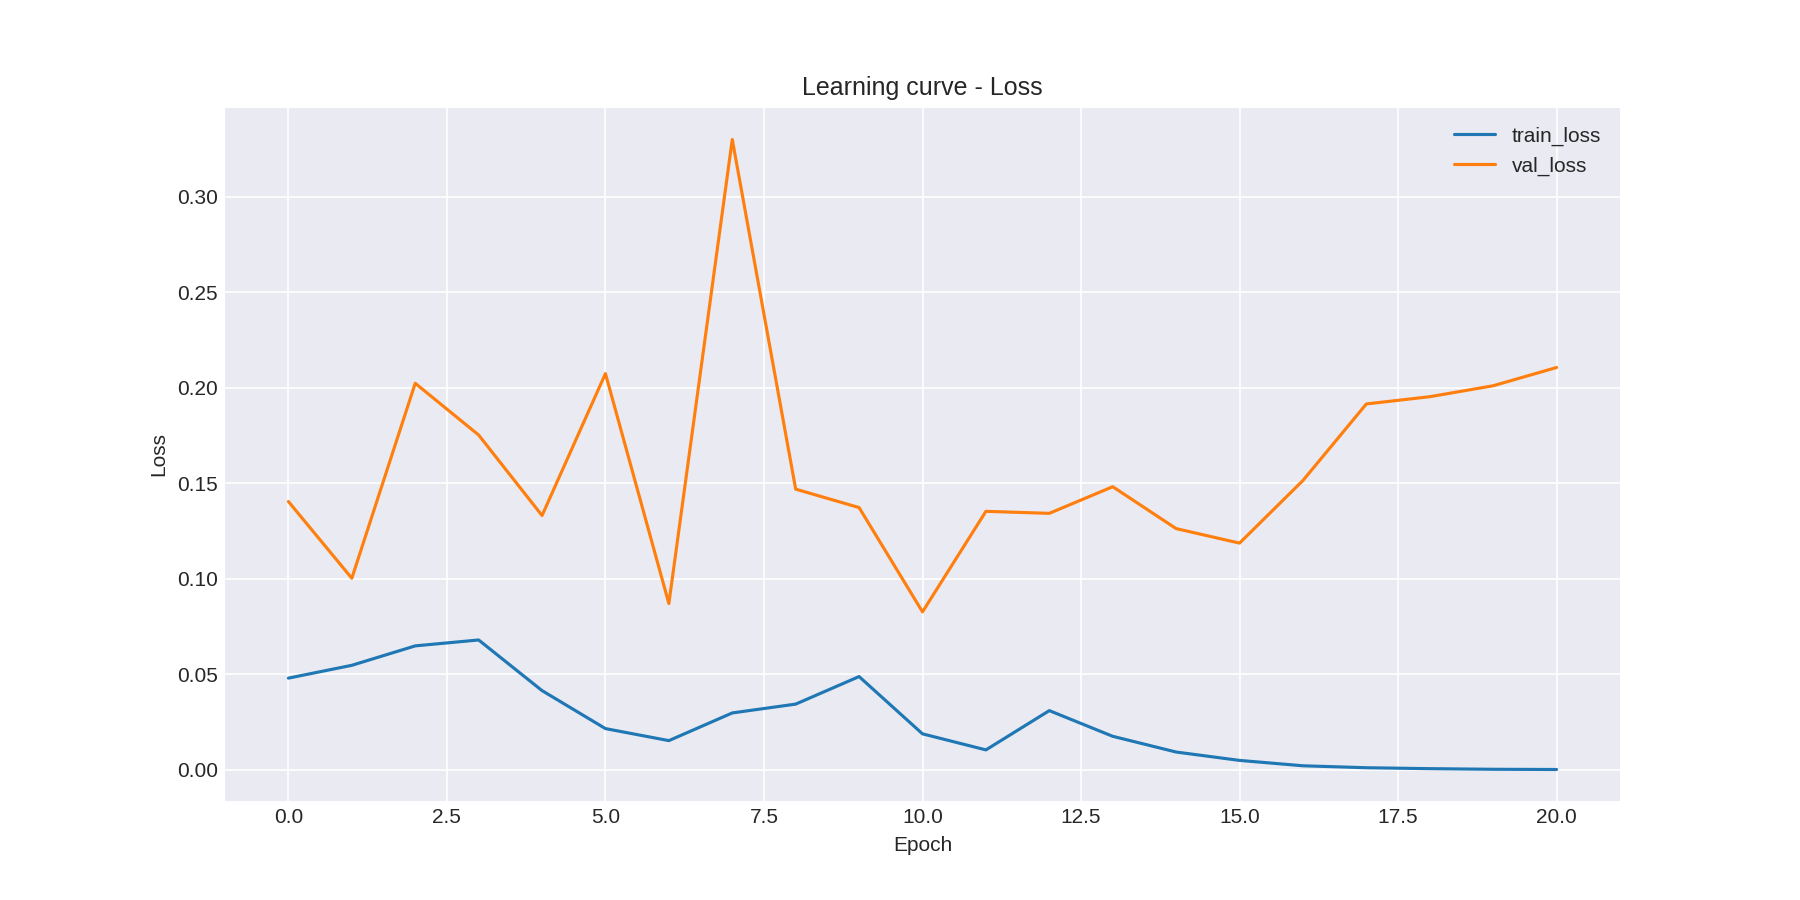

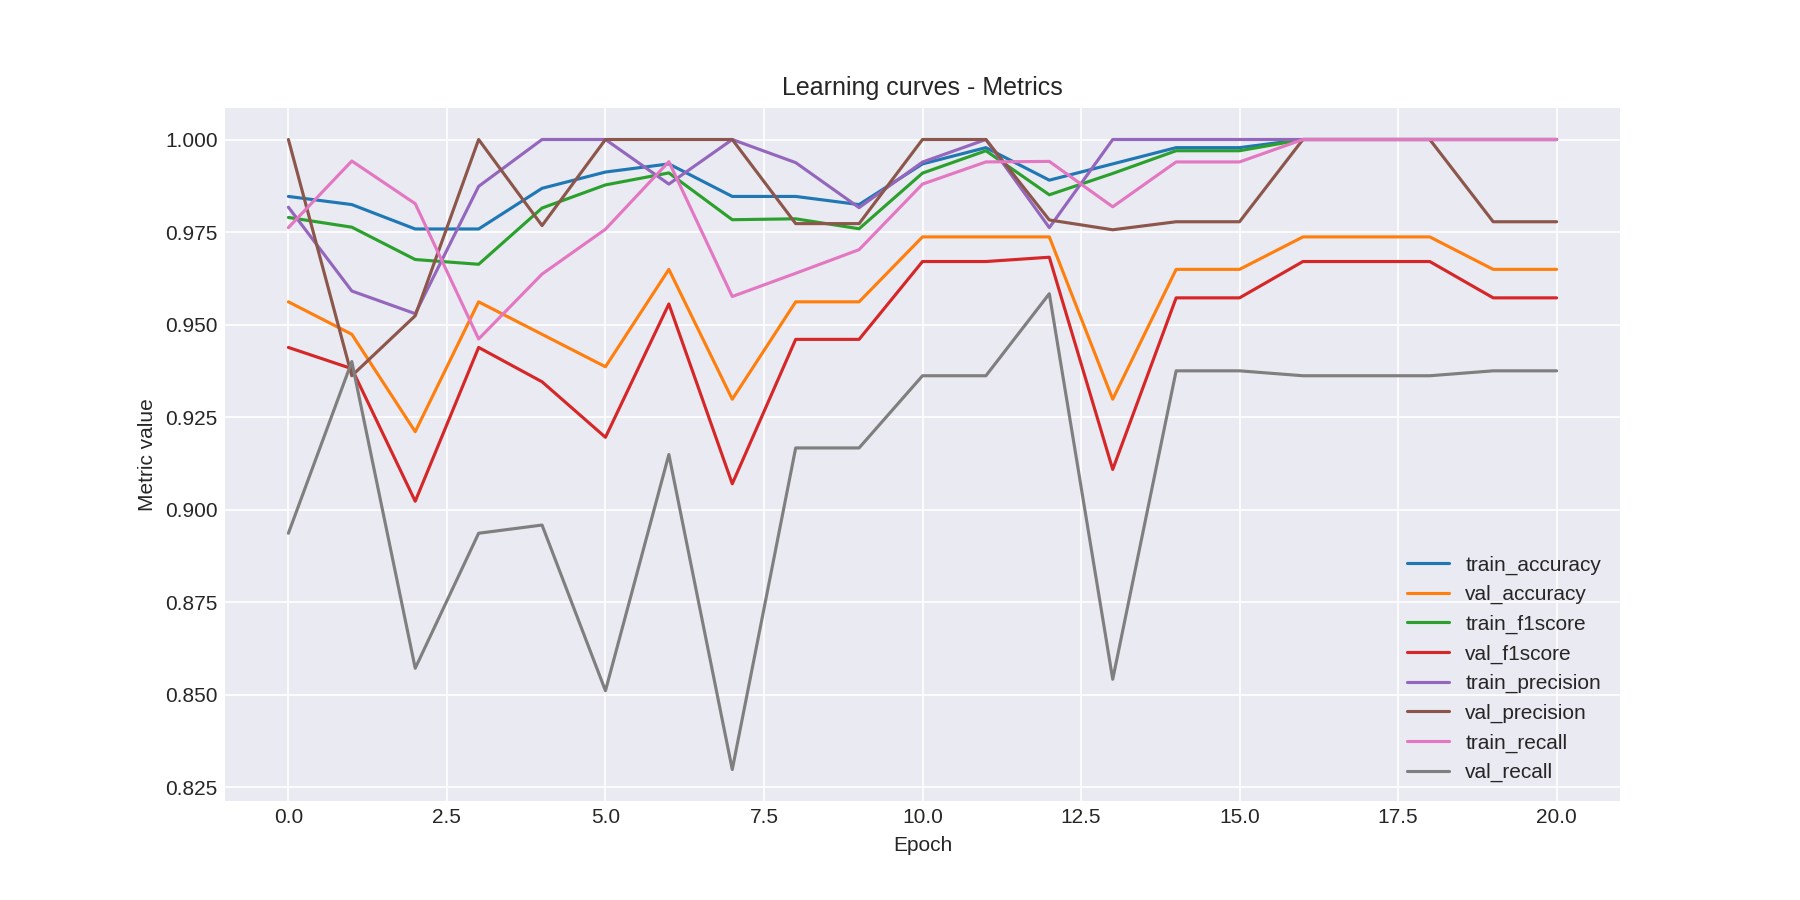

In [44]:
# Affichage des courbes d'apprentissage
ft_plot_learning_curves(history, out_prefix="mlp")

# Affichage des graphiques
from IPython.display import Image, display

if os.path.exists("./plots/mlp_loss.png"):
    display(Image("./plots/mlp_loss.png"))
if os.path.exists("./plots/mlp_metrics.png"):
    display(Image("./plots/mlp_metrics.png"))

## 5.7 Démos de Training - Comparaison de Différentes Configurations

Nous allons maintenant entraîner plusieurs modèles avec différentes configurations pour comparer leurs performances et visualiser les différents comportements.

### Démo 1 : Training Basique avec Accuracy uniquement

In [45]:
# Configuration basique : 2 couches cachées, Adam, Accuracy uniquement
print("=" * 60)
print("DÉMO 1 : Training Basique (24-24, Adam, Accuracy)")
print("=" * 60)

model_basic = CustomSequential([
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=1, activation="sigmoid")
])

model_basic.ft_build(X_train.shape[1])
model_basic.ft_compile(
    optimizer="Adam",
    loss="bce",
    metrics=["Accuracy"],
    learning_rate=0.0314
)

history_basic = model_basic.ft_fit(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    batch_size=8,
    epochs=50,
    callbacks=[History()]
)

model_basic.ft_save("./models/model_basic.pkl")
ft_plot_learning_curves(history_basic, out_prefix="demo_basic")
print("[+] Modèle basique sauvegardé et courbes générées")

DÉMO 1 : Training Basique (24-24, Adam, Accuracy)
epoch 01/50 - loss: 0.1206 - val_loss: 0.1496 - accuracy: 0.9758 - val_accuracy: 0.9474
epoch 02/50 - loss: 0.0390 - val_loss: 0.1504 - accuracy: 0.9846 - val_accuracy: 0.9737
epoch 03/50 - loss: 0.0568 - val_loss: 0.1107 - accuracy: 0.9780 - val_accuracy: 0.9825
epoch 04/50 - loss: 0.0668 - val_loss: 0.0977 - accuracy: 0.9824 - val_accuracy: 0.9561
epoch 05/50 - loss: 0.0329 - val_loss: 0.1069 - accuracy: 0.9890 - val_accuracy: 0.9737
epoch 06/50 - loss: 0.0135 - val_loss: 0.1011 - accuracy: 0.9978 - val_accuracy: 0.9825
epoch 07/50 - loss: 0.0179 - val_loss: 0.2606 - accuracy: 0.9956 - val_accuracy: 0.9737
epoch 08/50 - loss: 0.0302 - val_loss: 0.0890 - accuracy: 0.9956 - val_accuracy: 0.9737
epoch 09/50 - loss: 0.0323 - val_loss: 0.1253 - accuracy: 0.9912 - val_accuracy: 0.9737
epoch 10/50 - loss: 0.0476 - val_loss: 0.1134 - accuracy: 0.9758 - val_accuracy: 0.9474
epoch 11/50 - loss: 0.0506 - val_loss: 0.2688 - accuracy: 0.9802 - val

### Démo 2 : Training avec Toutes les Métriques

In [46]:
# Configuration avec toutes les métriques : Accuracy, Precision, Recall, F1Score
print("\\n" + "=" * 60)
print("DÉMO 2 : Training avec Toutes les Métriques")
print("=" * 60)

model_metrics = CustomSequential([
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=1, activation="sigmoid")
])

model_metrics.ft_build(X_train.shape[1])
model_metrics.ft_compile(
    optimizer="Adam",
    loss="bce",
    metrics=["Accuracy", "Precision", "Recall", "F1Score"],
    learning_rate=0.0314
)

history_metrics = model_metrics.ft_fit(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    batch_size=8,
    epochs=50,
    callbacks=[History()]
)

model_metrics.ft_save("./models/model_metrics.pkl")
ft_plot_learning_curves(history_metrics, out_prefix="demo_metrics")
print("[+] Modèle avec métriques complètes sauvegardé")

\n============================================================
DÉMO 2 : Training avec Toutes les Métriques
epoch 01/50 - loss: 0.0794 - val_loss: 0.2378 - accuracy: 0.9714 - precision: 0.9810 - recall: 0.9405 - f1score: 0.9603 - val_accuracy: 0.9298 - val_precision: 0.9756 - val_recall: 0.8542 - val_f1score: 0.9109
epoch 02/50 - loss: 0.0459 - val_loss: 0.1430 - accuracy: 0.9846 - precision: 0.9759 - recall: 0.9822 - f1score: 0.9791 - val_accuracy: 0.9561 - val_precision: 0.9565 - val_recall: 0.9388 - val_f1score: 0.9476
epoch 03/50 - loss: 0.0370 - val_loss: 0.0899 - accuracy: 0.9868 - precision: 0.9760 - recall: 0.9882 - f1score: 0.9821 - val_accuracy: 0.9737 - val_precision: 1.0000 - val_recall: 0.9362 - val_f1score: 0.9670
epoch 04/50 - loss: 0.0412 - val_loss: 0.2016 - accuracy: 0.9846 - precision: 0.9817 - recall: 0.9762 - f1score: 0.9789 - val_accuracy: 0.9561 - val_precision: 0.9773 - val_recall: 0.9167 - val_f1score: 0.9460
epoch 05/50 - loss: 0.0918 - val_loss: 0.1339 - accur

### Démo 3 : Training avec Early Stopping

In [47]:
# Configuration avec Early Stopping pour éviter le surapprentissage
print("\\n" + "=" * 60)
print("DÉMO 3 : Training avec Early Stopping")
print("=" * 60)

model_earlystop = CustomSequential([
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=1, activation="sigmoid")
])

model_earlystop.ft_build(X_train.shape[1])
model_earlystop.ft_compile(
    optimizer="Adam",
    loss="bce",
    metrics=["Accuracy"],
    learning_rate=0.0314
)

callbacks_earlystop = [
    History(),
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        min_delta=0.001,
        mode="min"
    )
]

history_earlystop = model_earlystop.ft_fit(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    batch_size=8,
    epochs=100,  # Plus d'epochs mais s'arrêtera tôt si pas d'amélioration
    callbacks=callbacks_earlystop
)

model_earlystop.ft_save("./models/model_earlystop.pkl")
ft_plot_learning_curves(history_earlystop, out_prefix="demo_earlystop")
print("[+] Modèle avec early stopping sauvegardé")

\n============================================================
DÉMO 3 : Training avec Early Stopping
epoch 01/100 - loss: 0.0759 - val_loss: 0.1165 - accuracy: 0.9780 - val_accuracy: 0.9561
epoch 02/100 - loss: 0.0366 - val_loss: 0.0909 - accuracy: 0.9890 - val_accuracy: 0.9649
epoch 03/100 - loss: 0.0258 - val_loss: 0.1241 - accuracy: 0.9912 - val_accuracy: 0.9737
epoch 04/100 - loss: 0.0344 - val_loss: 0.3343 - accuracy: 0.9868 - val_accuracy: 0.9474
epoch 05/100 - loss: 0.0341 - val_loss: 0.0868 - accuracy: 0.9868 - val_accuracy: 0.9737
epoch 06/100 - loss: 0.0262 - val_loss: 0.1128 - accuracy: 0.9934 - val_accuracy: 0.9737
epoch 07/100 - loss: 0.0179 - val_loss: 0.3021 - accuracy: 0.9934 - val_accuracy: 0.9474
epoch 08/100 - loss: 0.0232 - val_loss: 0.0744 - accuracy: 0.9956 - val_accuracy: 0.9737
epoch 09/100 - loss: 0.0083 - val_loss: 0.1125 - accuracy: 0.9956 - val_accuracy: 0.9825
epoch 10/100 - loss: 0.0158 - val_loss: 0.0665 - accuracy: 0.9956 - val_accuracy: 0.9825
epoch 11/

### Démo 4 : Training avec Architecture Plus Profonde (3 couches)

In [48]:
# Configuration avec 3 couches cachées : 24-24-24
print("\\n" + "=" * 60)
print("DÉMO 4 : Training avec Architecture Plus Profonde (24-24-24)")
print("=" * 60)

model_deep = CustomSequential([
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=24, activation="relu"),  # 3ème couche cachée
    DenseLayer(units=1, activation="sigmoid")
])

model_deep.ft_build(X_train.shape[1])
model_deep.ft_compile(
    optimizer="Adam",
    loss="bce",
    metrics=["Accuracy"],
    learning_rate=0.0314
)

history_deep = model_deep.ft_fit(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    batch_size=8,
    epochs=50,
    callbacks=[History()]
)

model_deep.ft_save("./models/model_deep.pkl")
ft_plot_learning_curves(history_deep, out_prefix="demo_deep")
print("[+] Modèle profond sauvegardé")

\n============================================================
DÉMO 4 : Training avec Architecture Plus Profonde (24-24-24)
epoch 01/50 - loss: 0.0618 - val_loss: 0.1177 - accuracy: 0.9780 - val_accuracy: 0.9737
epoch 02/50 - loss: 0.1120 - val_loss: 0.1598 - accuracy: 0.9714 - val_accuracy: 0.9298
epoch 03/50 - loss: 0.0427 - val_loss: 0.1046 - accuracy: 0.9868 - val_accuracy: 0.9561
epoch 04/50 - loss: 0.0333 - val_loss: 0.1294 - accuracy: 0.9890 - val_accuracy: 0.9649
epoch 05/50 - loss: 0.0291 - val_loss: 0.1189 - accuracy: 0.9890 - val_accuracy: 0.9474
epoch 06/50 - loss: 0.0196 - val_loss: 0.2258 - accuracy: 0.9912 - val_accuracy: 0.9474
epoch 07/50 - loss: 0.0552 - val_loss: 0.2140 - accuracy: 0.9802 - val_accuracy: 0.9474
epoch 08/50 - loss: 0.0343 - val_loss: 0.0797 - accuracy: 0.9890 - val_accuracy: 0.9737
epoch 09/50 - loss: 0.0146 - val_loss: 0.1374 - accuracy: 0.9956 - val_accuracy: 0.9649
epoch 10/50 - loss: 0.0387 - val_loss: 0.2059 - accuracy: 0.9846 - val_accuracy: 0.9

### Démo 5 : Training avec Optimiseur SGD (comparaison avec Adam)

In [49]:
# Configuration avec SGD au lieu d'Adam pour comparer les optimiseurs
print("\\n" + "=" * 60)
print("DÉMO 5 : Training avec Optimiseur SGD")
print("=" * 60)

model_sgd = CustomSequential([
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=24, activation="relu"),
    DenseLayer(units=1, activation="sigmoid")
])

model_sgd.ft_build(X_train.shape[1])
model_sgd.ft_compile(
    optimizer="SGD",  # SGD au lieu d'Adam
    loss="bce",
    metrics=["Accuracy"],
    learning_rate=0.0314
)

history_sgd = model_sgd.ft_fit(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    batch_size=8,
    epochs=50,
    callbacks=[History()]
)

model_sgd.ft_save("./models/model_sgd.pkl")
ft_plot_learning_curves(history_sgd, out_prefix="demo_sgd")
print("[+] Modèle avec SGD sauvegardé")

\n============================================================
DÉMO 5 : Training avec Optimiseur SGD
epoch 01/50 - loss: 0.2012 - val_loss: 0.2291 - accuracy: 0.9363 - val_accuracy: 0.9123
epoch 02/50 - loss: 0.1327 - val_loss: 0.1806 - accuracy: 0.9582 - val_accuracy: 0.9298
epoch 03/50 - loss: 0.1026 - val_loss: 0.1528 - accuracy: 0.9714 - val_accuracy: 0.9386
epoch 04/50 - loss: 0.0856 - val_loss: 0.1395 - accuracy: 0.9714 - val_accuracy: 0.9474
epoch 05/50 - loss: 0.0749 - val_loss: 0.1333 - accuracy: 0.9758 - val_accuracy: 0.9561
epoch 06/50 - loss: 0.0670 - val_loss: 0.1306 - accuracy: 0.9780 - val_accuracy: 0.9561
epoch 07/50 - loss: 0.0612 - val_loss: 0.1244 - accuracy: 0.9824 - val_accuracy: 0.9561
epoch 08/50 - loss: 0.0566 - val_loss: 0.1218 - accuracy: 0.9846 - val_accuracy: 0.9561
epoch 09/50 - loss: 0.0531 - val_loss: 0.1143 - accuracy: 0.9890 - val_accuracy: 0.9561
epoch 10/50 - loss: 0.0497 - val_loss: 0.1196 - accuracy: 0.9890 - val_accuracy: 0.9561
epoch 11/50 - loss:

## 5.8 Comparaison Visuelle des Différents Modèles

Comparons maintenant visuellement les performances des différents modèles entraînés.

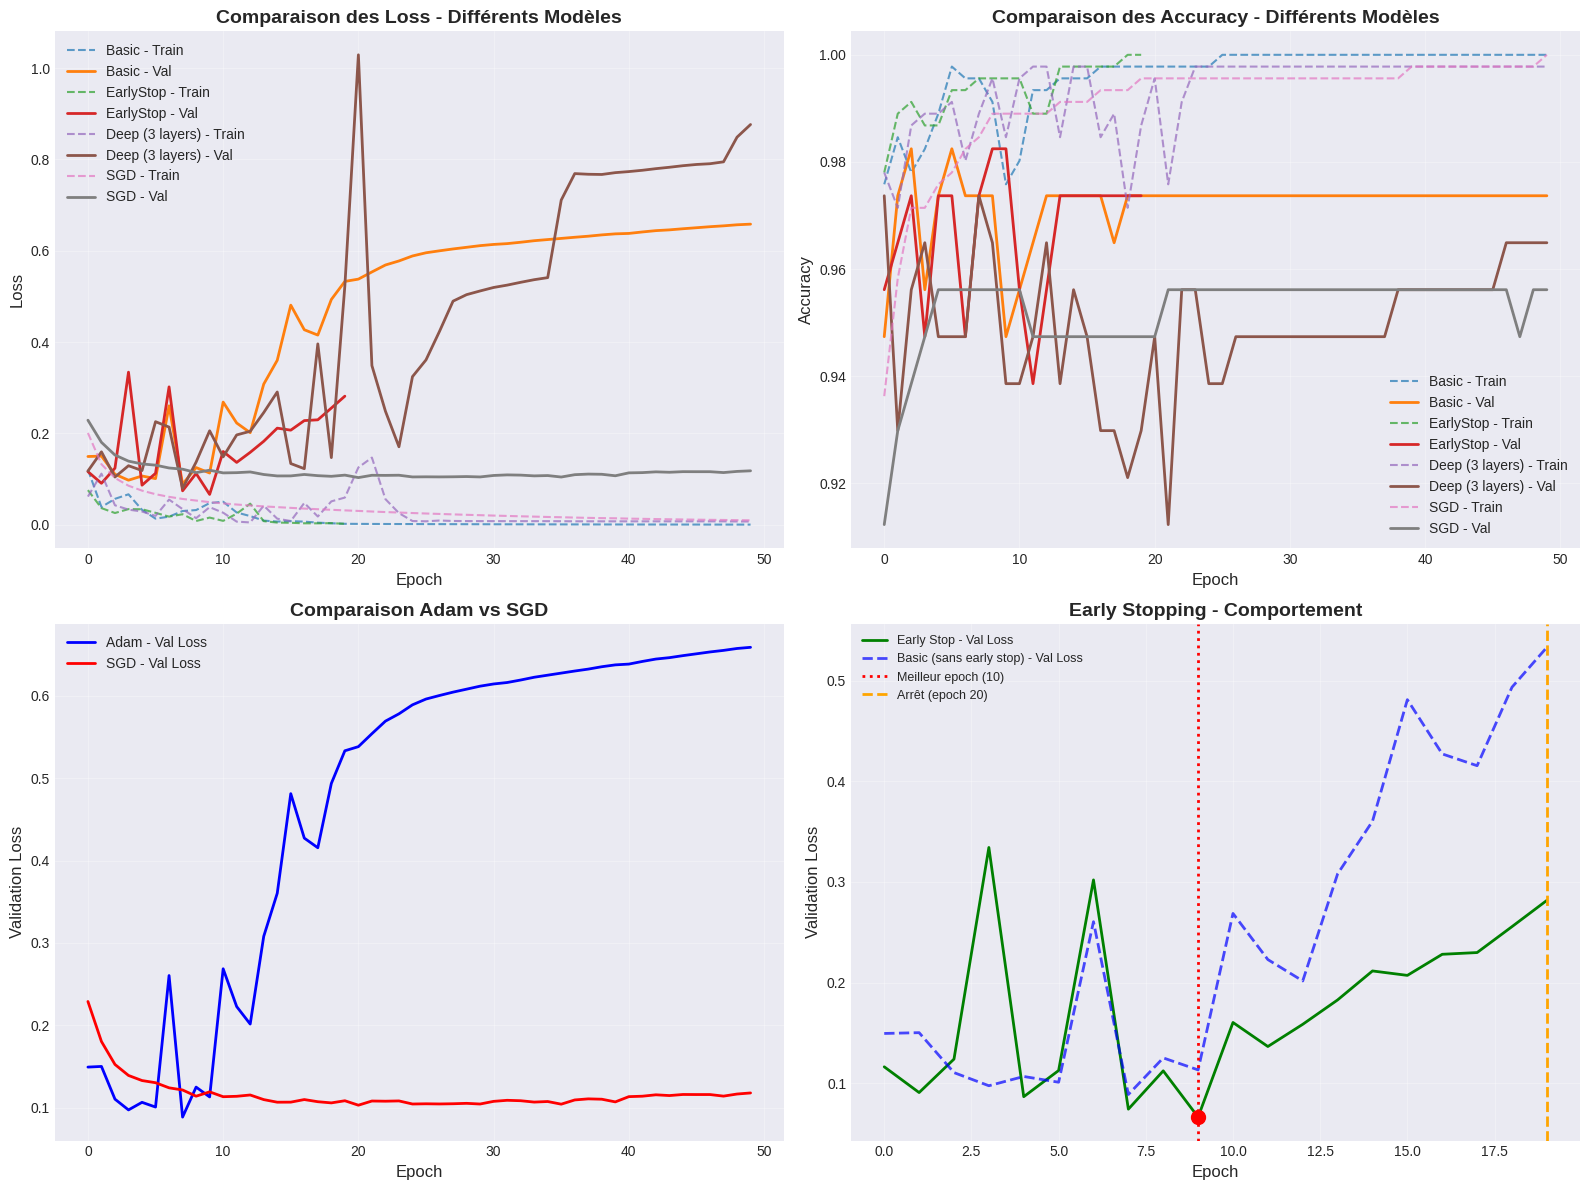

[+] Graphique de comparaison sauvegardé dans ./plots/comparison_all_models.png

[*] RÉSUMÉ DES PERFORMANCES FINALES

Basic (24-24, Adam):
  Val Loss: 0.6584, Val Acc: 0.9737

Deep (24-24-24, Adam):
  Val Loss: 0.8766, Val Acc: 0.9649

SGD (24-24, SGD):
  Val Loss: 0.1182, Val Acc: 0.9561

Early Stop (24-24, Adam):
  Val Loss: 0.2817, Val Acc: 0.9737
  Arrêté à l'epoch: 20



In [50]:
# Comparaison visuelle des courbes de loss
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Comparaison des Loss (Train et Validation)
ax1 = axes[0, 0]
if 'history_basic' in locals():
    h = history_basic.history
    ax1.plot(h.get('loss', []), label='Basic - Train', linestyle='--', alpha=0.7)
    ax1.plot(h.get('val_loss', []), label='Basic - Val', linewidth=2)
if 'history_earlystop' in locals():
    h = history_earlystop.history
    ax1.plot(h.get('loss', []), label='EarlyStop - Train', linestyle='--', alpha=0.7)
    ax1.plot(h.get('val_loss', []), label='EarlyStop - Val', linewidth=2)
if 'history_deep' in locals():
    h = history_deep.history
    ax1.plot(h.get('loss', []), label='Deep (3 layers) - Train', linestyle='--', alpha=0.7)
    ax1.plot(h.get('val_loss', []), label='Deep (3 layers) - Val', linewidth=2)
if 'history_sgd' in locals():
    h = history_sgd.history
    ax1.plot(h.get('loss', []), label='SGD - Train', linestyle='--', alpha=0.7)
    ax1.plot(h.get('val_loss', []), label='SGD - Val', linewidth=2)

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Comparaison des Loss - Différents Modèles', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Comparaison des Accuracy
ax2 = axes[0, 1]
if 'history_basic' in locals():
    h = history_basic.history
    if 'accuracy' in h:
        ax2.plot(h['accuracy'], label='Basic - Train', linestyle='--', alpha=0.7)
    if 'val_accuracy' in h:
        ax2.plot(h['val_accuracy'], label='Basic - Val', linewidth=2)
if 'history_earlystop' in locals():
    h = history_earlystop.history
    if 'accuracy' in h:
        ax2.plot(h['accuracy'], label='EarlyStop - Train', linestyle='--', alpha=0.7)
    if 'val_accuracy' in h:
        ax2.plot(h['val_accuracy'], label='EarlyStop - Val', linewidth=2)
if 'history_deep' in locals():
    h = history_deep.history
    if 'accuracy' in h:
        ax2.plot(h['accuracy'], label='Deep (3 layers) - Train', linestyle='--', alpha=0.7)
    if 'val_accuracy' in h:
        ax2.plot(h['val_accuracy'], label='Deep (3 layers) - Val', linewidth=2)
if 'history_sgd' in locals():
    h = history_sgd.history
    if 'accuracy' in h:
        ax2.plot(h['accuracy'], label='SGD - Train', linestyle='--', alpha=0.7)
    if 'val_accuracy' in h:
        ax2.plot(h['val_accuracy'], label='SGD - Val', linewidth=2)

ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Comparaison des Accuracy - Différents Modèles', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Comparaison Adam vs SGD
ax3 = axes[1, 0]
if 'history_basic' in locals() and 'history_sgd' in locals():
    h_adam = history_basic.history
    h_sgd = history_sgd.history
    ax3.plot(h_adam.get('val_loss', []), label='Adam - Val Loss', linewidth=2, color='blue')
    ax3.plot(h_sgd.get('val_loss', []), label='SGD - Val Loss', linewidth=2, color='red')
    ax3.set_xlabel('Epoch', fontsize=12)
    ax3.set_ylabel('Validation Loss', fontsize=12)
    ax3.set_title('Comparaison Adam vs SGD', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# Visualisation de l'Early Stopping
ax4 = axes[1, 1]
if 'history_earlystop' in locals():
    h_earlystop = history_earlystop.history
    val_loss_earlystop = h_earlystop.get('val_loss', [])
    epochs_earlystop = len(val_loss_earlystop)
    
    # Courbe de validation loss pour early stopping
    ax4.plot(val_loss_earlystop, label='Early Stop - Val Loss', linewidth=2, color='green')
    
    # Comparaison avec le modèle basique si disponible
    if 'history_basic' in locals():
        h_basic = history_basic.history
        val_loss_basic = h_basic.get('val_loss', [])
        # Tronquer pour avoir la même longueur que early stop
        if len(val_loss_basic) > epochs_earlystop:
            val_loss_basic = val_loss_basic[:epochs_earlystop]
        ax4.plot(val_loss_basic, label='Basic (sans early stop) - Val Loss', 
                linewidth=2, linestyle='--', color='blue', alpha=0.7)
    
    # Ligne verticale indiquant où l'entraînement s'est arrêté
    if epochs_earlystop > 0:
        best_epoch = np.argmin(val_loss_earlystop)
        best_val_loss = val_loss_earlystop[best_epoch]
        ax4.axvline(x=best_epoch, color='red', linestyle=':', linewidth=2, 
                   label=f'Meilleur epoch ({best_epoch+1})')
        ax4.scatter([best_epoch], [best_val_loss], color='red', s=100, zorder=5)
        ax4.axvline(x=epochs_earlystop-1, color='orange', linestyle='--', linewidth=2,
                   label=f'Arrêt (epoch {epochs_earlystop})')
    
    ax4.set_xlabel('Epoch', fontsize=12)
    ax4.set_ylabel('Validation Loss', fontsize=12)
    ax4.set_title('Early Stopping - Comportement', fontsize=14, fontweight='bold')
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3)
else:
    ax4.axis('off')
    ax4.text(0.5, 0.5, 'Early Stopping non disponible\n(Exécutez la Démo 3)', 
             ha='center', va='center', fontsize=12, style='italic')

plt.tight_layout()
plt.savefig('./plots/comparison_all_models.png', dpi=150, bbox_inches='tight')
plt.show()

print("[+] Graphique de comparaison sauvegardé dans ./plots/comparison_all_models.png")

# Résumé des performances finales - Affichage dans le terminal
print("\n" + "=" * 60)
print("[*] RÉSUMÉ DES PERFORMANCES FINALES")
print("=" * 60)

if 'history_basic' in locals():
    h = history_basic.history
    final_val_loss = h.get('val_loss', [])[-1] if h.get('val_loss', []) else 0
    final_val_acc = h.get('val_accuracy', [])[-1] if h.get('val_accuracy', []) else 0
    print(f"\nBasic (24-24, Adam):")
    print(f"  Val Loss: {final_val_loss:.4f}, Val Acc: {final_val_acc:.4f}")

if 'history_deep' in locals():
    h = history_deep.history
    final_val_loss = h.get('val_loss', [])[-1] if h.get('val_loss', []) else 0
    final_val_acc = h.get('val_accuracy', [])[-1] if h.get('val_accuracy', []) else 0
    print(f"\nDeep (24-24-24, Adam):")
    print(f"  Val Loss: {final_val_loss:.4f}, Val Acc: {final_val_acc:.4f}")

if 'history_sgd' in locals():
    h = history_sgd.history
    final_val_loss = h.get('val_loss', [])[-1] if h.get('val_loss', []) else 0
    final_val_acc = h.get('val_accuracy', [])[-1] if h.get('val_accuracy', []) else 0
    print(f"\nSGD (24-24, SGD):")
    print(f"  Val Loss: {final_val_loss:.4f}, Val Acc: {final_val_acc:.4f}")

if 'history_earlystop' in locals():
    h = history_earlystop.history
    final_val_loss = h.get('val_loss', [])[-1] if h.get('val_loss', []) else 0
    final_val_acc = h.get('val_accuracy', [])[-1] if h.get('val_accuracy', []) else 0
    epochs_stopped = len(h.get('loss', []))
    print(f"\nEarly Stop (24-24, Adam):")
    print(f"  Val Loss: {final_val_loss:.4f}, Val Acc: {final_val_acc:.4f}")
    print(f"  Arrêté à l'epoch: {epochs_stopped}")

print("\n" + "=" * 60)

## 5.9 Démo de Prédiction

Maintenant, utilisons un des modèles entraînés pour faire des prédictions sur l'ensemble de validation.

In [51]:
# Chargement du modèle et prédiction
print("=" * 60)
print("DÉMO DE PRÉDICTION")
print("=" * 60)

# Charger le modèle basique
model_predict = CustomSequential()
model_predict.ft_load("./models/model_basic.pkl")

# Compiler le modèle (nécessaire pour l'évaluation)
model_predict.ft_compile(
    optimizer="Adam",
    loss="bce",
    metrics=["Accuracy", "Precision", "Recall", "F1Score"],
    learning_rate=0.0314
)

# Prédictions sur l'ensemble de validation
y_pred = model_predict.ft_predict(X_valid)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Évaluation complète
loss, metrics = model_predict.ft_evaluate(X_valid, y_valid)

print("\\n[*] RÉSULTATS SUR L'ENSEMBLE DE VALIDATION:")
print(f"   - Loss (BCE): {loss:.6f}")
for name, value in metrics.items():
    print(f"   - {name}: {value:.4f}")

# Affichage de quelques prédictions détaillées
print("\\n[*] PRÉDICTIONS DÉTAILLÉES (20 premiers échantillons):")
print("-" * 80)
print(f"{'Index':<8} {'Vrai':<12} {'Prédit':<12} {'Probabilité':<15} {'Statut':<10}")
print("-" * 80)

correct = 0
for i in range(min(20, len(y_pred))):
    true_label = "Malignant" if y_valid[i, 0] == 1 else "Benign"
    pred_label = "Malignant" if y_pred_binary[i, 0] == 1 else "Benign"
    proba = y_pred[i, 0]
    status = "[+] Correct" if y_valid[i, 0] == y_pred_binary[i, 0] else "[-] Erreur"
    if status == "[+] Correct":
        correct += 1
    print(f"{i+1:<8} {true_label:<12} {pred_label:<12} {proba:<15.4f} {status:<10}")

print("-" * 80)
print(f"\\nTaux de réussite sur les 20 premiers: {correct}/20 = {correct/20*100:.1f}%")

# Export des prédictions
from plotting import ft_export_predictions_txt
ft_export_predictions_txt(y_pred, y_valid, out_prefix="demo_predictions")
print("\\n[+] Prédictions exportées dans ./plots/demo_predictions.txt")

DÉMO DE PRÉDICTION
\n[*] RÉSULTATS SUR L'ENSEMBLE DE VALIDATION:
   - Loss (BCE): 0.658406
   - Accuracy: 0.9737
   - Precision: 1.0000
   - Recall: 0.9362
   - F1Score: 0.9670
\n[*] PRÉDICTIONS DÉTAILLÉES (20 premiers échantillons):
--------------------------------------------------------------------------------
Index    Vrai         Prédit       Probabilité     Statut    
--------------------------------------------------------------------------------
1        Malignant    Malignant    1.0000          [+] Correct 
2        Malignant    Malignant    1.0000          [+] Correct 
3        Benign       Benign       0.0000          [+] Correct 
4        Malignant    Malignant    1.0000          [+] Correct 
5        Malignant    Malignant    1.0000          [+] Correct 
6        Benign       Benign       0.0000          [+] Correct 
7        Benign       Benign       0.0000          [+] Correct 
8        Benign       Benign       0.0000          [+] Correct 
9        Malignant    Malignan

### 5.7 Résumé des Performances

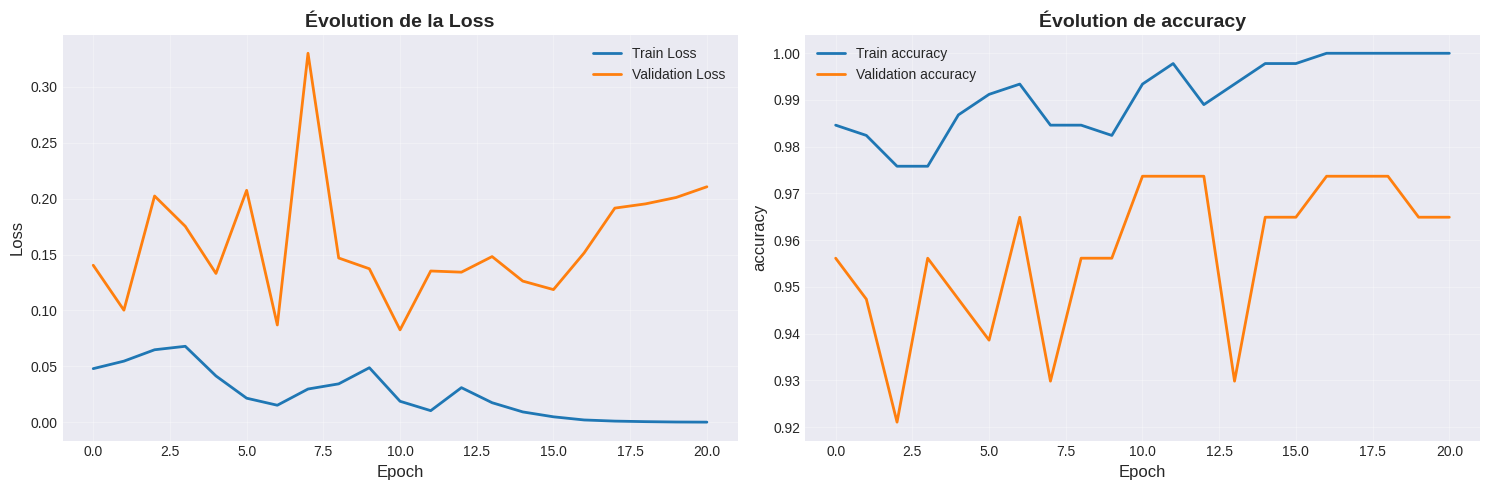

\n[*] Meilleures performances:
   - Meilleure Validation Loss: 0.082684 (epoch 11)
   - Meilleure Validation accuracy: 0.9737 (epoch 11)
\n[>] Nombre total d'époques: 21


In [52]:
# Affichage d'un résumé visuel des performances
import matplotlib.pyplot as plt

if 'history' in locals() and history is not None:
    h = history.history
    
    # Graphique comparatif des métriques
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss
    axes[0].plot(h.get('loss', []), label='Train Loss', linewidth=2)
    axes[0].plot(h.get('val_loss', []), label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Évolution de la Loss', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy (ou autre métrique principale)
    metric_key = None
    for key in ['accuracy', 'Accuracy']:
        if key in h:
            metric_key = key
            break
    
    if metric_key:
        axes[1].plot(h.get(metric_key, []), label=f'Train {metric_key}', linewidth=2)
        val_key = f'val_{metric_key}'
        if val_key in h:
            axes[1].plot(h[val_key], label=f'Validation {metric_key}', linewidth=2)
        axes[1].set_xlabel('Epoch', fontsize=12)
        axes[1].set_ylabel(metric_key, fontsize=12)
        axes[1].set_title(f'Évolution de {metric_key}', fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Affichage des meilleures valeurs
    print("\\n[*] Meilleures performances:")
    if 'val_loss' in h and len(h['val_loss']) > 0:
        best_loss_epoch = np.argmin(h['val_loss'])
        print(f"   - Meilleure Validation Loss: {min(h['val_loss']):.6f} (epoch {best_loss_epoch + 1})")
    
    if metric_key and f'val_{metric_key}' in h:
        best_metric_epoch = np.argmax(h[f'val_{metric_key}'])
        print(f"   - Meilleure Validation {metric_key}: {max(h[f'val_{metric_key}']):.4f} (epoch {best_metric_epoch + 1})")
    
    print(f"\\n[*] Nombre total d'époques: {len(h.get('loss', []))}")
else:
    print("[!] Aucune historique disponible. Veuillez d'abord entraîner le modèle.")

### 5.6 Évaluation du Modèle

In [53]:
# Évaluation sur l'ensemble de validation
loss, metrics = model.ft_evaluate(X_valid, y_valid)

print("[*] Résultats sur l'ensemble de validation:")
print(f"   - Loss (BCE): {loss:.6f}")
for name, value in metrics.items():
    print(f"   - {name}: {value:.4f}")

# Prédictions
y_pred = model.ft_predict(X_valid)
y_pred_binary = (y_pred >= 0.5).astype(int)

print(f"\n[*] Prédictions (10 premiers échantillons):")
for i in range(min(10, len(y_pred))):
    true_label = "Malignant" if y_valid[i, 0] == 1 else "Benign"
    pred_label = "Malignant" if y_pred_binary[i, 0] == 1 else "Benign"
    proba = y_pred[i, 0]
    status = "[+]" if y_valid[i, 0] == y_pred_binary[i, 0] else "[-]"
    print(f"   {status} Échantillon {i+1}: Vrai={true_label}, Prédit={pred_label} (prob={proba:.3f})")

[*] Résultats sur l'ensemble de validation:
   - Loss (BCE): 0.210564
   - Accuracy: 0.9649
   - Precision: 0.9778
   - Recall: 0.9375
   - F1Score: 0.9572

[*] Prédictions (10 premiers échantillons):
   [+] Échantillon 1: Vrai=Malignant, Prédit=Malignant (prob=1.000)
   [+] Échantillon 2: Vrai=Malignant, Prédit=Malignant (prob=1.000)
   [+] Échantillon 3: Vrai=Benign, Prédit=Benign (prob=0.000)
   [+] Échantillon 4: Vrai=Malignant, Prédit=Malignant (prob=1.000)
   [+] Échantillon 5: Vrai=Malignant, Prédit=Malignant (prob=1.000)
   [+] Échantillon 6: Vrai=Benign, Prédit=Benign (prob=0.000)
   [+] Échantillon 7: Vrai=Benign, Prédit=Benign (prob=0.000)
   [+] Échantillon 8: Vrai=Benign, Prédit=Benign (prob=0.000)
   [+] Échantillon 9: Vrai=Malignant, Prédit=Malignant (prob=1.000)
   [+] Échantillon 10: Vrai=Benign, Prédit=Benign (prob=0.000)


## 6. Résultats et Performance

### Métriques Attendues

| Métrique | Valeur Attendue |
|----------|------------------|
| **Accuracy** | 95-98% |
| **Validation Loss** | 0.04-0.08 |
| **Temps d'entraînement** | 10-30 secondes |
| **Convergence** | 40-60 époques |

### Points Forts de l'Implémentation

[+] **Modularité** : Architecture modulaire et extensible  
[+] **API Keras-like** : Interface familière avec `compile()`, `fit()`, `predict()`  
[+] **Optimiseurs avancés** : Implémentation complète d'Adam  
[+] **Métriques complètes** : Accuracy, Precision, Recall, F1-Score  
[+] **Callbacks** : History tracking et Early Stopping  
[+] **Visualisations** : Courbes d'apprentissage automatiques

## 7. Détails Techniques

### 7.1 Initialisation des Poids

Utilisation de l'initialisation de **He** (Kaiming) pour les couches ReLU :
$$
\text{limit} = \sqrt{\frac{2.0}{\text{input\_dim}}}, \quad W \sim \mathcal{N}(0, \text{limit})
$$

Cette initialisation prévient les problèmes de gradients qui disparaissent ou explosent, particulièrement adaptée pour ReLU.

### 7.2 Normalisation des Données

**Normalisation Z-score** :
$$
X_{norm} = \frac{X - \mu}{\sigma}
$$

**[!] Critique** : Les statistiques ($\mu$ et $\sigma$) sont calculées **uniquement sur l'ensemble d'entraînement**, puis appliquées à l'ensemble de validation. Cela évite le **data leakage** (fuite d'information).

### 7.3 Train/Validation Split

Split aléatoire avec reproductibilité :
```python
np.random.seed(seed)
indices = np.random.permutation(len(X))
split_idx = int((1 - valid_ratio) * len(X))
train_idx = indices[:split_idx]
valid_idx = indices[split_idx:]
```

### 7.4 Batch Training

L'entraînement se fait par **mini-batches** avec mélange aléatoire à chaque époque. Cela :
- Améliore la convergence
- Réduit la variance des gradients
- Accélère l'entraînement sur de grands datasets

## 8. Conclusion

Ce projet démontre une **compréhension approfondie** des réseaux de neurones en implémentant chaque composant depuis zéro :

[*] **Compréhension théorique** : Maîtrise des mathématiques derrière les réseaux de neurones  
[*] **Compétences en programmation** : Code modulaire, propre et bien structuré  
[*] **Analyse de données** : Préprocessing, visualisation et évaluation  
[*] **Ingénierie logicielle** : Architecture extensible et API intuitive

### Compétences Développées

- **Algèbre linéaire** : Matrices, produits matriciels, gradients
- **Calcul différentiel** : Dérivées partielles, chaîne de dérivation
- **Optimisation** : Descente de gradient, Adam
- **Machine Learning** : Classification binaire, métriques d'évaluation
- **Python** : NumPy, pandas, matplotlib

---

**Projet réalisé dans le cadre du cursus 42 School**  
*Score obtenu : 125% (mandatory + bonus)*

---

## [*] Conclusion : API Keras-like avec Classes Custom

Ce projet démontre une **compréhension approfondie** de l'architecture de Keras/TensorFlow en implémentant une API similaire avec des classes personnalisées.

### Points Clés de l'Implémentation Custom

[+] **Architecture Modulaire** : Chaque composant (layers, optimizers, losses, metrics, callbacks) est implémenté comme une classe séparée, suivant le design pattern de Keras

[+] **API Intuitive** : Interface familière avec `compile()`, `fit()`, `predict()`, `evaluate()` - permet une transition facile depuis Keras

[+] **Extensibilité** : Architecture conçue pour être facilement étendue avec de nouvelles couches, optimiseurs ou métriques

[+] **Compréhension Profonde** : Implémentation depuis zéro révèle les mécanismes internes (backpropagation, gradients, optimiseurs)

### Classes Custom vs Keras

| Composant | Custom | Keras | Fonctionnalité |
|-----------|--------|-------|----------------|
| Modèle | `CustomSequential` | `keras.Sequential` | Empilement de couches |
| Couche | `DenseLayer` | `keras.layers.Dense` | Transformation linéaire + activation |
| Optimiseur | `Adam`, `SGD` | `keras.optimizers.*` | Mise à jour des poids |
| Perte | `BinaryCrossEntropy` | `keras.losses.*` | Calcul de la perte |
| Métrique | `Accuracy`, `Precision`, etc. | `keras.metrics.*` | Évaluation |
| Callback | `History`, `EarlyStopping` | `keras.callbacks.*` | Suivi de l'entraînement |

### Avantages de cette Approche

[*] **Pédagogique** : Comprendre chaque ligne de code derrière un réseau de neurones  
[*] **Technique** : Maîtrise des algorithmes fondamentaux (backpropagation, Adam, etc.)  
[*] **Professionnel** : Démontre la capacité à comprendre et reproduire des architectures complexes  
[*] **Pratique** : API familière facilite l'adoption et l'intégration

---